4


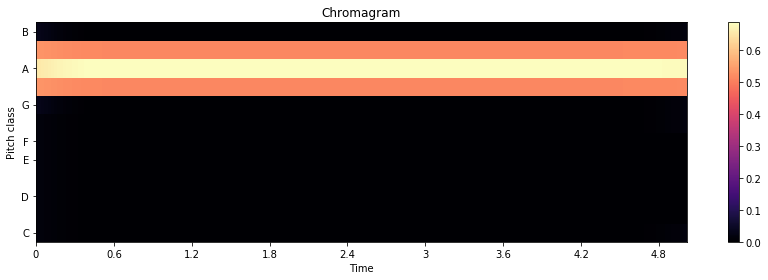

C 0.0
C# 0.0
D 0.0
D# 0.0
E 0.0
F 0.0
F# 0.0
G 0.0
G# 0.5144957554275265
A 0.6859943405700354
A# 0.5144957554275265
B 0.0
0.6859943405700354
9


In [8]:
import matplotlib.pyplot as plt,librosa,librosa.display
import math

y,sr = librosa.load("../../Music/single/440.wav")

C = librosa.feature.chroma_cens(y=y, sr=sr)

pos = 44

print(math.floor(C.shape[1]/44))

plt.figure(figsize=(12,4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma')
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()
plt.show()

lst = []

for i,_ in enumerate(["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]):
    print(_,C[i][pos])
    lst.append(C[i][pos])
    
print(max(lst))
print(lst.index(max(lst)))

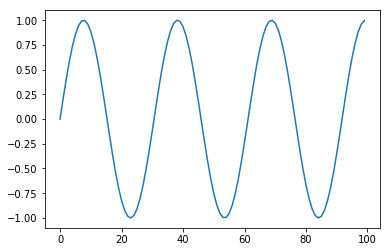

In [22]:
import wave
import numpy as np
from matplotlib import pylab as plt
import struct

a = 1     #振幅
fs = 8000 #サンプリング周波数
f0 = 261.626  #周波数
sec = 49   #秒

swav=[]

for n in np.arange(fs * sec):
    #サイン波を生成
    s = a * np.sin(2.0 * np.pi * f0 * n / fs)
    swav.append(s)

#サイン波を表示
plt.plot(swav[0:100])
plt.show()

#サイン波を-32768から32767の整数値に変換(signed 16bit pcmへ)
swav = [int(x * 32767.0) for x in swav]

#バイナリ化
binwave = struct.pack("h" * len(swav), *swav)

#サイン波をwavファイルとして書き出し
w = wave.Wave_write("./scale/1.wav")
p = (1, 2, 8000, len(binwave), 'NONE', 'not compressed')
w.setparams(p)
w.writeframes(binwave)
w.close()


* 44おきに値を取得するとできそう